# Anlizando correlaciones entre activos, y realizando indices sinteticos, como forma de exposicion permamente a mercado

Vamos a cargar las librerias necesarias.

In [42]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 20,12
plt.style.use('ggplot')
import matplotlib.mlab as mlab
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


Cargamos los archivos de los futuros, en este lab en el github se incluiran una version reducida de los mismos

In [28]:
vixcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$VIX.csv',parse_dates=['Date'],index_col=['Date'])
spcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$SP.csv',parse_dates=['Date'],index_col=['Date'])
bondcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$TYX.csv',parse_dates=['Date'],index_col=['Date'])
djcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$DJ.csv',parse_dates=['Date'],index_col=['Date'])
nqcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$NQ.csv',parse_dates=['Date'],index_col=['Date'])
usdcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$DX.csv',parse_dates=['Date'],index_col=['Date'])
gldcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$GC.csv',parse_dates=['Date'],index_col=['Date'])
alcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$AL.csv',parse_dates=['Date'],index_col=['Date'])
caccash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$CA.csv',parse_dates=['Date'],index_col=['Date'])
dxcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$DA.csv',parse_dates=['Date'],index_col=['Date'])
plcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$PL.csv',parse_dates=['Date'],index_col=['Date'])
lhcash = pd.read_csv('/home/py/lab1/lab1/datasets/Futures/Cash/$LH.csv',parse_dates=['Date'],index_col=['Date'])


Creamos un nuevo dataframe, para anadir los datos necesarios para su posterior tratamiento.

In [29]:
df = pd.DataFrame()
df = df.reindex_like(vixcash)
df['VIX'] = vixcash.Close
df['SPX'] = spcash.Close
df['30Y'] = bondcash.Close
df['DJ'] = djcash.Close
df['NQ'] = nqcash.Close
df['GC'] = gldcash.Close
df['DX'] = usdcash.Close
df['AL'] = alcash.Close
df['CAC'] = caccash.Close
df['DX'] = dxcash.Close
df['PL'] = plcash.Close
df['LH'] = lhcash.Close
df['US'] = usdcash.Close
df=df.drop(['Ticker','Open','High','Low','Close','Volume','Open Interest'],axis=1)

Calculamos correlaciones entre columnas ( activos financieros)

In [30]:
correlacion = df.corr(method = 'kendall')
correlacion_mean = correlacion.mean() 
print(correlacion_mean)

VIX   -0.000137
SPX    0.409595
30Y   -0.230538
DJ     0.412120
NQ     0.403612
GC     0.241680
DX     0.410683
AL     0.237212
CAC    0.338756
PL     0.302840
LH     0.157359
US    -0.025664
dtype: float64


# Ploteamos un mapa de calor, para visualizar las conclusiones

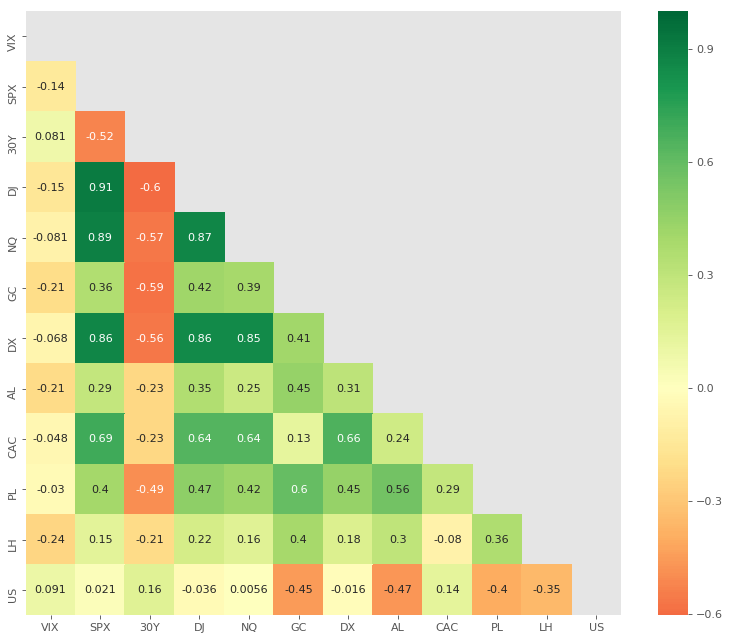

In [31]:
mask = np.zeros_like(correlacion, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


plt.figure(figsize=(12,10),dpi=80)
sns.heatmap(correlacion,mask=mask,
            cmap='RdYlGn',center=0, annot=True)

# Adaptamos las funciones del webinario 3 de @tiotino a nuestras necesidades

In [32]:
def calculate_aggregate(values, graph=True,box=True):
    t_test=(values.mean()/(values.std()/math.sqrt(len(values))))
    agg_measures = {
        'avg': np.round(values.mean(),3),
        'std': values.std(),
        'var': values.var(),
        'val': values.quantile(.95)/values.quantile(.05),
        '05p': values.quantile(.05),
        '50p': values.quantile(.50),
        '95p': values.quantile(.95),
        '01p': values.quantile(.01),
        'skw': values.skew(),
        'kur': values.kurtosis(),
        'T-test': t_test
    }
    
    for n in sorted(agg_measures.keys()):
        koko=" el valor de {} es : {:2.5} ".format(n,agg_measures[n])
        print (koko)
    
    print('Maximo Retorno 1D :'+str(values.pct_change().max()*100) + '%')
    print('El Dia :'+str(values.pct_change().idxmax()))
    print('Minimo Retorno 1D :'+str(values.pct_change().min()*100) + '%')
    print('El Dia :'+str(values.pct_change().idxmin()))
    print('Maximo Historico:'+str(values.max()))
    print('El Dia :'+str(values.idxmax()))
    print('Minimo Historico :'+str(values.min()))
    print('El Dia :'+str(values.idxmin()))
    
   


In [37]:
def correlations(df1,df2, graph=True,info=True,period=30):
    if graph==True :
        avg=np.round(df1.mean(),3)
        std=df1.std()
        df1.hist(bins=40,normed=True,alpha=0.7)
        plt.show()
        avg2=np.round(df2.mean(),3)
        std2=df2.std()
        df2.hist(bins=40,normed=True,alpha=0.7)
        plt.show()
        calculate_aggregate(df2)
        corrs = df1.rolling(period).corr(df2.rolling(period))
        desde = corrs.index > '2000-01-01'
        corrs = corrs[desde]
        corrs.plot()
    if info==True :
        print('-------------------')
        print('Estadisticas de df1')
        print('-------------------')
        calculate_aggregate(df1)
        print('-------------------')
        print('Estadisticas de df2')
        print('-------------------')

    return corrs ;

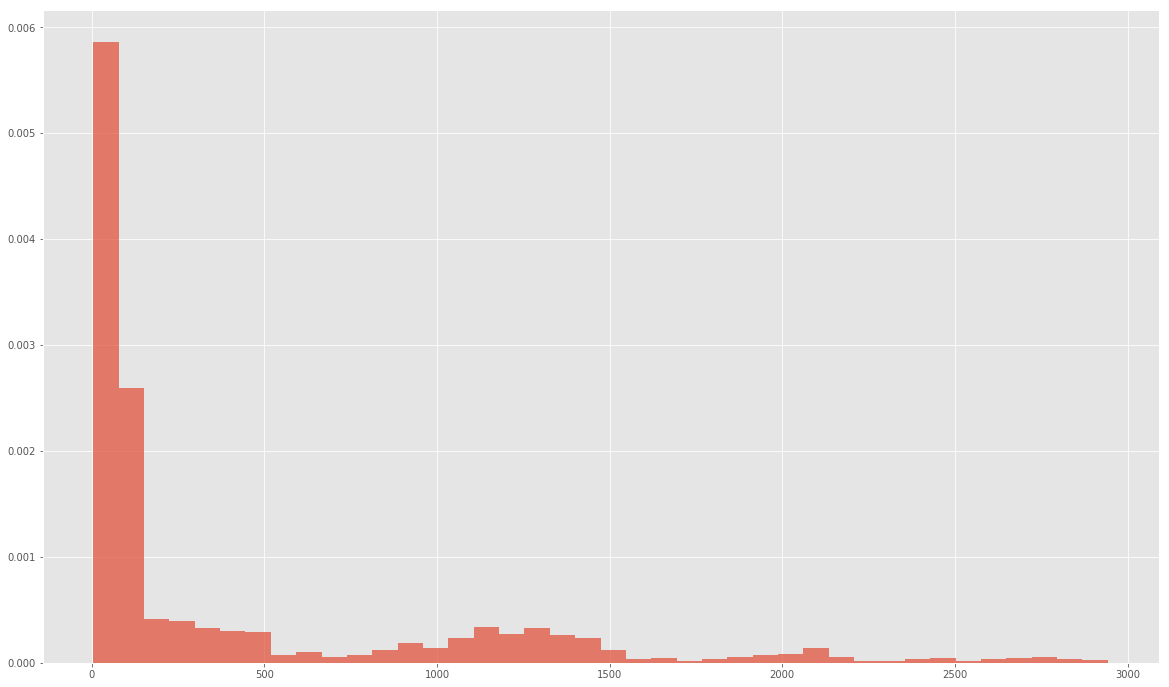

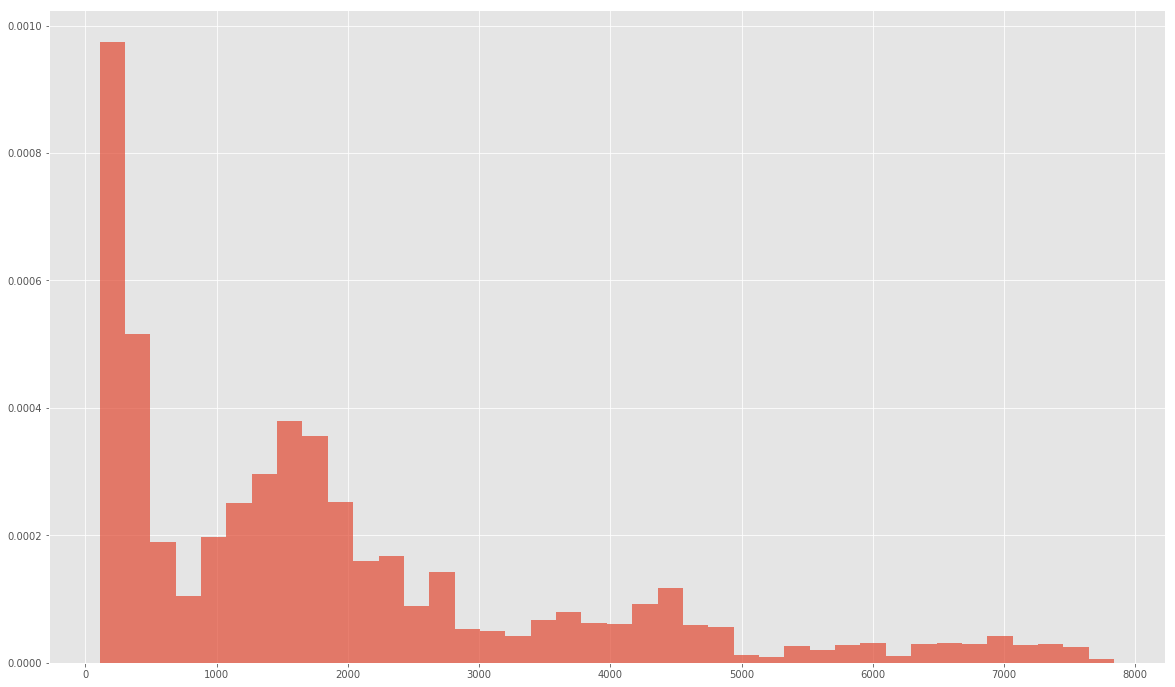

 el valor de 01p es : 132.71 
 el valor de 05p es : 166.46 
 el valor de 50p es : 1484.5 
 el valor de 95p es : 5916.0 
 el valor de T-test es : 98.274 
 el valor de avg es : 1888.9 
 el valor de kur es : 1.2329 
 el valor de skw es : 1.3269 
 el valor de std es : 1768.2 
 el valor de val es : 35.54 
 el valor de var es : 3.1266e+06 
Maximo Retorno 1D :18.771307714682006%
El Dia :2001-01-03 00:00:00
Minimo Retorno 1D :-15.077616826254193%
El Dia :1987-10-19 00:00:00
Maximo Historico:7839.040040000001
El Dia :2019-04-29 00:00:00
Minimo Historico :107.16
El Dia :1985-10-08 00:00:00
-------------------
Estadisticas de df1
-------------------
 el valor de 01p es : 7.2 
 el valor de 05p es : 9.71 
 el valor de 50p es : 94.32 
 el valor de 95p es : 1920.0 
 el valor de T-test es : 102.62 
 el valor de avg es : 424.19 
 el valor de kur es : 2.4458 
 el valor de skw es : 1.775 
 el valor de std es : 640.64 
 el valor de val es : 197.74 
 el valor de var es : 4.1042e+05 
Maximo Retorno 1D :16.6

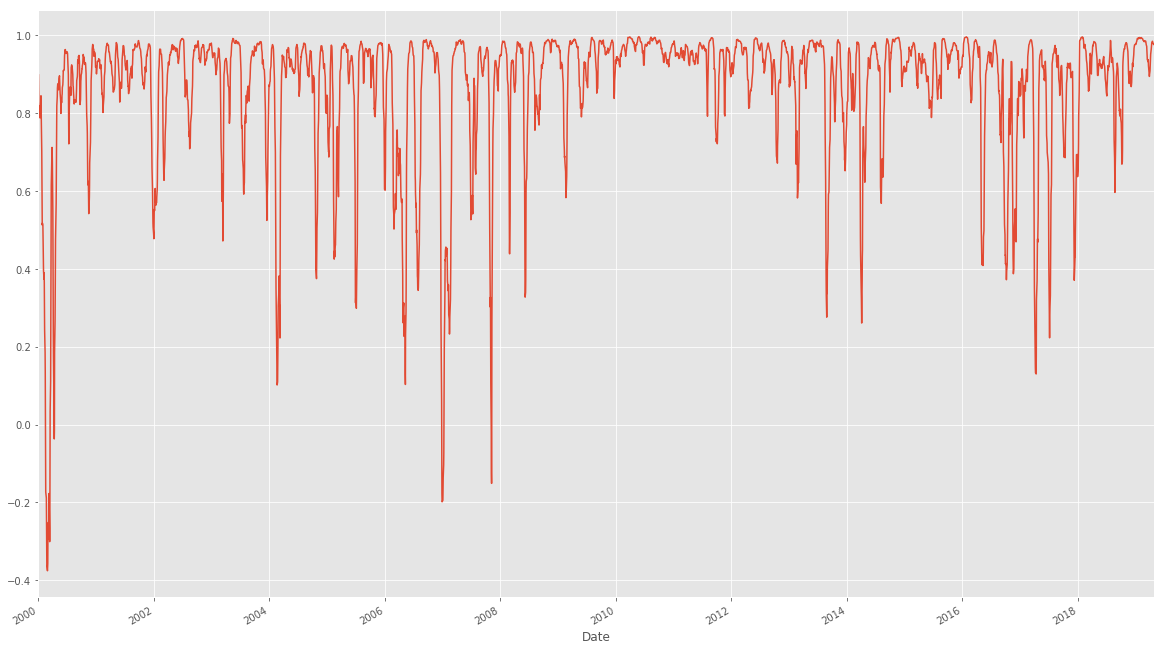

In [43]:
corrs = correlations(spcash.Close,nqcash.Close)

# Creacion de Indices Sinteticos

Vamos a generar unas carteras, y vamos a seleccionar criterios al azar, que cada uno ya se trabaje sus indices , todo el contenido aqui publicado esta ideado dentro del ambito divulgativo,no para proporcionar sistemas rentables

In [44]:
cartera6 = 0.15* usdcash.Close.pct_change() + 0.75 * bondcash.Close.pct_change()
cartera5 = 0.15*dxcash.Close.pct_change() + 0.10*caccash.Close.pct_change() + 0.25 * djcash.Close.pct_change() + 0.25* nqcash.Close.pct_change() + 0.25 * spcash.Close.pct_change()
cartera4 = 0.75* spcash.Close.pct_change() + 0.25 * bondcash.Close.pct_change()
cartera3 = -1* spcash.Close.pct_change()
cartera2 = 0.30* nqcash.Close.pct_change() + 0.30 * djcash.Close.pct_change() + 0.40 * spcash.Close.pct_change()
cartera1 = 0.25* spcash.Close.pct_change() + 0.75 * bondcash.Close.pct_change()


In [45]:
cartera = pd.DataFrame()
trades = pd.DataFrame()
cartera['1'] = (cartera1)*100
cartera['2'] = (cartera2)*100
cartera['3'] = (cartera3)*100
cartera['4'] = (cartera4)*100
cartera['5'] = (cartera5)*100
cartera['6'] = (cartera6)*100

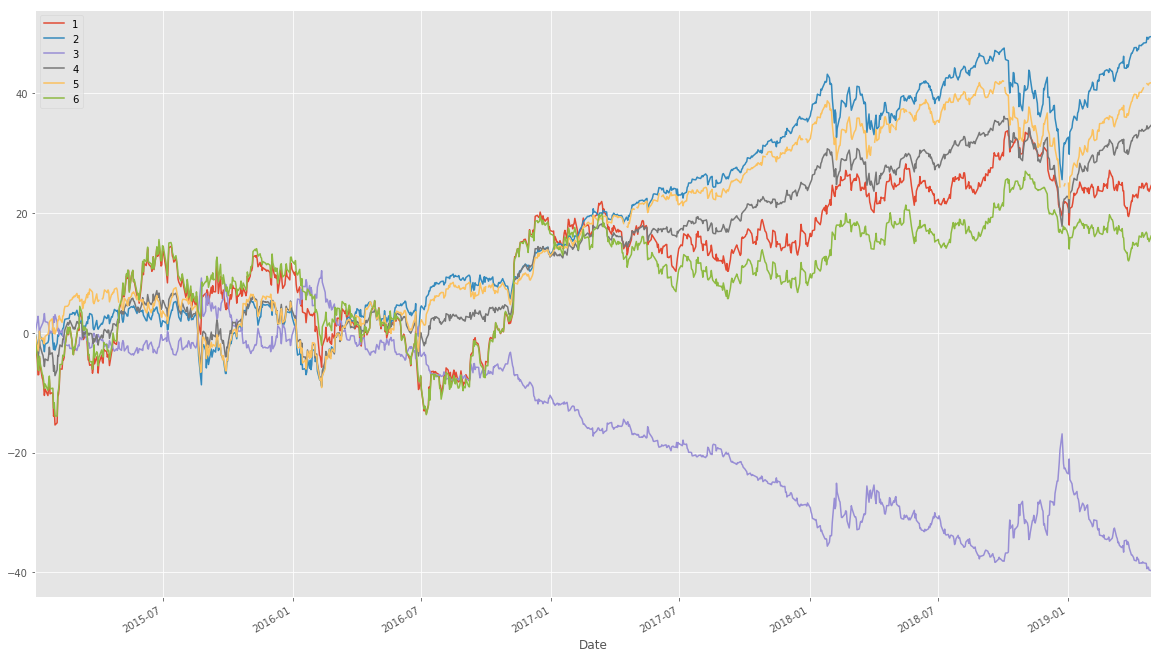

In [46]:
sett = cartera.index > '2015-01-01'
cartera = cartera[sett]
cartera = cartera.cumsum()
cartera.plot()
plt.show()

Como conclusion, hay que ver, que el buy and hold es una alternativa rentable, aburrida pero rentable. Todo esto se ira mejorando en entras posteriores, como buscaremos y backtestearemos estascionalidades diarias, o realizaremos rebalanceos , incluso, quien sabe si algun script con keras, que mediante tecnicas de DL, reajuste la carter...